In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="../../../../repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)

from matplotlib.gridspec import GridSpec
import BoundaryFinder as BF
def plot_hillline(ax,nmin=1,nmax=1,colorl="gray",colordict=None,textonly=[],label=True,linewidth=None,s=60,scatterwidth=None):
    nrange=np.arange(1.4,nmax+0.2,0.05)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    if label:
        label="Hill line"
    else:
        label=None
    ax.plot(hillline[:,0],hillline[:,1],color=colorl,linestyle='-',label=label,linewidth=linewidth)
        
    for n in range(nmin,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color=colorl
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=colorl,marker="x",s=s,linewidths=scatterwidth)
        if n in textonly:
            ax.text(ph+0.02,sh-0.05,'%d'%n,color=color)
        
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

In [2]:
from matplotlib import rcParams
#rcParams.update({
#   'font.family':'sans-serif',
#    'font.sans-serif':['Liberation Sans'],
#    })
rcParams["font.size"]=14


In [3]:

foldernew="../boundaryanalysis_notebooks/ashapes"   


In [4]:
ashape=np.load(os.path.join(foldernew,"N4Pb1000_7_centreandul_stitched_cutp=0.28_2023_8_21.npy"))

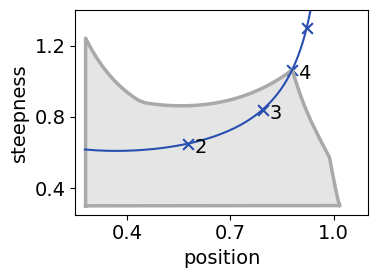

In [5]:
fig,ax=plt.subplots(1,1,figsize=(4,3))

ax.plot(ashape[0],ashape[1],color="darkgrey",linestyle="-",linewidth=2.5)
#ashape=alphashape.alphashape(list(zip(ashape[0],ashape[1])),alpha=3.55)
ax.fill(ashape[0],ashape[1],"gray",alpha=0.2)
nmax=6
colorhill="#284fb0"
ax=plot_hillline(ax,nmin=2,nmax=8,textonly=[2,3,4],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})
ax.set_xlim(0.25,1.1)
ax.set_xlabel("position")
ax.set_ylabel("steepness")
ax.set_xticks([0.4,0.7,1.0])
ax.set_yticks([0.4,0.8,1.2])
#ax.text(0.45,1.25,"hypercube "+r"$\mathcal{C}_{4+1}$",useTex=True,fontsize=18)
ax.set_ylim(0.25,1.4)


plt.tight_layout()
#plt.savefig("../figs/Fig1B_extendedul.pdf",bbox_inches="tight")

plt.show()

Now let's plot the cusp also for the boundaries with smaller parameter ranges:

In [6]:
ashape3=np.load(os.path.join(foldernew,"ashape_N4Pb1000_3_2024_1_12.npy"))
ashape4=np.load(os.path.join(foldernew,"ashape_N4Pb1000_4_2024_1_12.npy"))
ashape6=np.load(os.path.join(foldernew,"ashape_N4Pb1000_6_2022_3_14.npy"))

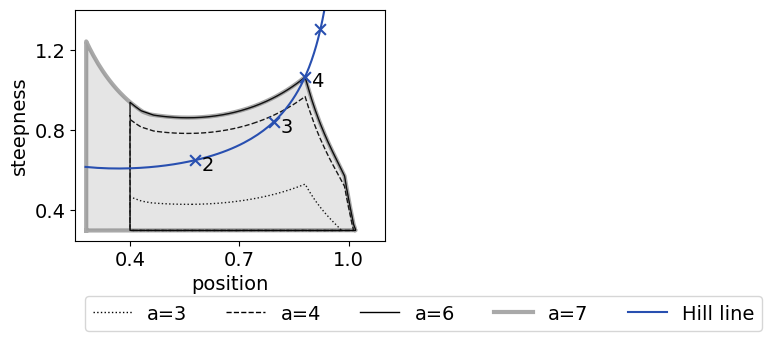

In [7]:
plims=[3,4,6,7]
colors=["k","k","k", "darkgray"]
linestyles=[":", "--", "-", "-"]
zorders=[1,1,1,-1]
linewidths=[1, 1, 1, 3]
fig,ax=plt.subplots(1,1,figsize=(4,3))

for a,ashape_ in enumerate([ashape3, ashape4, ashape6, ashape]):
    ax.plot(ashape_[0],ashape_[1],zorder=zorders[a],color=colors[a],linestyle=linestyles[a],linewidth=linewidths[a],label="a=%d"%plims[a])
#ashape=alphashape.alphashape(list(zip(ashape[0],ashape[1])),alpha=3.55)
ax.fill(ashape[0],ashape[1],"gray",alpha=0.2)
nmax=6
colorhill="#284fb0"
ax=plot_hillline(ax,nmin=2,nmax=8,textonly=[2,3,4],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})
ax.set_xlim(0.25,1.1)
ax.set_xlabel("position")
ax.set_ylabel("steepness")
ax.set_xticks([0.4,0.7,1.0])
ax.set_yticks([0.4,0.8,1.2])
#ax.text(0.45,1.25,"hypercube "+r"$\mathcal{C}_{4+1}$",useTex=True,fontsize=18)
ax.set_ylim(0.25,1.4)

ax.legend(loc="upper left", bbox_to_anchor=(0,-0.2), bbox_transform=ax.transAxes,ncol=5)
#plt.tight_layout()
#plt.savefig("../figs/Fig1B_allb.pdf",bbox_inches="tight")

plt.show()

In [ ]:
from matplotlib.gridspec import GridSpec

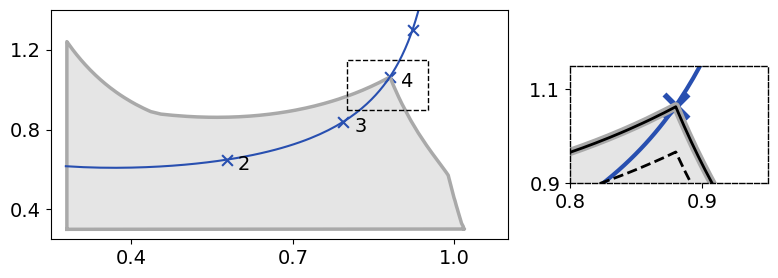

In [27]:
#now the same as above but with limit only aroudn the cusp, so remove ashape3
plims=[3,4,6,7]
ashapes=[ashape3, ashape4, ashape6, ashape]
colors=["k","k","k", "darkgray"]
linestyles=[":", "--", "-", "-"]
zorders=[3,3,3,2]
linewidths=[3, 2, 2, 6]

box_xlim=[0.8,0.95] #0.2 
box_ylim=[0.9,1.15]#0.25
xlim_boundary=[0.25,1.1]
ylim_boundary=[0.25,1.4]
fig=plt.figure(figsize=(8,3))
gs = GridSpec(5, 6, )
ax1 = fig.add_subplot(gs[0:5,0:4])
ax2 = fig.add_subplot(gs[1:4,4:6])
#fig,axes=plt.subplots(1,2,figsize=(8,4),gridspec_kw={'width_ratios': [1.75, 1]})
ax=ax1
ax.plot(ashape[0],ashape[1],color="darkgrey",linestyle="-",linewidth=2.5)
#ashape=alphashape.alphashape(list(zip(ashape[0],ashape[1])),alpha=3.55)
ax.fill(ashape[0],ashape[1],"gray",alpha=0.2)
nmax=6
colorhill="#284fb0"
ax=plot_hillline(ax,nmin=2,nmax=8,textonly=[2,3,4],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})
ax.set_xlim(xlim_boundary[0],xlim_boundary[1])
#ax.set_xlabel("position")
#ax.set_ylabel("steepness")
ax.set_xticks([0.4,0.7,1.0])
ax.set_yticks([0.4,0.8,1.2])
#ax.text(0.45,1.25,"hypercube "+r"$\mathcal{C}_{4+1}$",useTex=True,fontsize=18)
ax.set_ylim(ylim_boundary[0],ylim_boundary[1])
x0,x1=box_xlim
y0,y1=box_ylim
ax.plot([x0,x1,x1,x0,x0],[y0,y0,y1,y1,y0],color="k",linewidth=1,linestyle="--")
ax=ax2
ax=plot_hillline(ax,nmin=4,nmax=8,textonly=[],colorl=colorhill,linewidth=3,s=300,scatterwidth=4,label=False)
for a in range(1,4):
    ashape_=ashapes[a]
    ax.plot(ashape_[0],ashape_[1],zorder=zorders[a],color=colors[a],linestyle=linestyles[a],linewidth=linewidths[a],label="a=%d"%plims[a])
#ashape=alphashape.alphashape(list(zip(ashape[0],ashape[1])),alpha=3.55)
ax.fill(ashape[0],ashape[1],"gray",alpha=0.2)
nmax=6

ax.set_xticks([0.7,0.8,0.9,1])
ax.set_yticks([0.7,0.9, 1.1])
ax.set_xlim(x0,x1)
ax.set_ylim(y0,y1)
for spine in ax.spines.values():
    spine.set_linestyle("--")
    spine.set_linewidth(1)
#ax.text(0.45,1.25,"hypercube "+r"$\mathcal{C}_{4+1}$",useTex=True,fontsize=18)
#ax.set_xlabel("position")
#ax.set_ylabel("steepness")

#ax.legend(loc="upper left", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,ncol=1,title="parameter\n    range\n[$10^{-a}$, $10^a$]",frameon=False,)
#plt.tight_layout()
plt.savefig("../figs/Fig1B_cusp.svg",bbox_inches="tight")
plt.tight_layout()
plt.show()